In [1]:
import numpy as np
import aerokit.common.defaultgas as defg
import aerokit.aero.Isentropic as Is
import aerokit.aero.ShockWave  as sw
import aerokit.aero.MassFlow   as mf
#import aerokit.aero.nozzle     as nz
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['font.size'] = 14 ; plt.rcParams['lines.linewidth'] = 1.5
#print plt.rcParams.keys()
# for slides
#plt.rcParams['font.size'] = 24 ; plt.rcParams['grid.linewidth'] = 2 ; plt.rcParams['lines.linewidth'] = 4
#
def new_plot(xlab, ylab):
    plt.figure(figsize=(15,8))
    plt.xlabel(xlab); plt.ylabel(ylab)
    plt.grid(which='major', linestyle='-', alpha=0.8)
    plt.grid(which='minor', linestyle=':', alpha=0.5)

## Definition of flow section

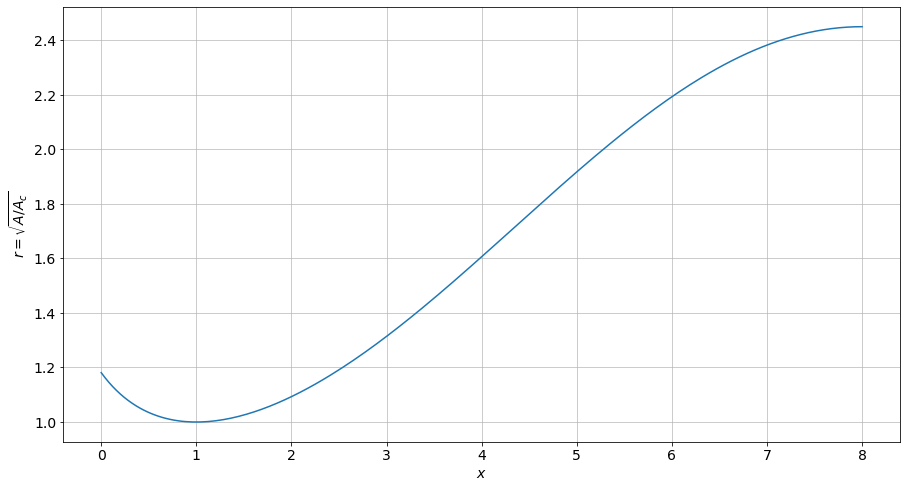

In [2]:
target_AoAc = 6.
length      = 8.
#
# set an A/Ac law from a Mach evolution, ensure exit Mach number is consistent with As/Ac
Noz_x    = np.linspace(0., length, 200, endpoint=True)
ma_max   = mf.Mach_Sigma(target_AoAc, Mach=2.)
ma       = 1. + (ma_max-1.)*np.sin(.5*(Noz_x-1.)*np.pi/(length-1.))
Noz_AoAc = mf.Sigma_Mach(ma)
#
#new_plot('$x$', 'Mach, $r=\sqrt{A/A_c}$') ; plt.plot(Noz_x, ma, Noz_x, np.sqrt(Noz_AoAc))
new_plot('$x$', '$r=\sqrt{A/A_c}$') ; plt.plot(Noz_x, np.sqrt(Noz_AoAc))
#
coord_x = np.append(Noz_x, [length, 1.05*length])  # define x coordinate with 2 additional points

# Computation of limits of flow regimes

In [4]:
# choked NPR but subsonic
Msub = mf.MachSub_Sigma(target_AoAc)
NPR0 = Is.PtPs_Mach(Msub)
# choked and supersonic
Msup = mf.MachSup_Sigma(target_AoAc)
NPR1 = Is.PtPs_Mach(Msup)
# choked, supersonic and shock at exit
Msh   = sw.downstream_Mn(Msup)
NPRsw = Is.PtPs_Mach(Msh) / sw.Pi_ratio(Msup)
#
print ("NPR limits are ", NPR0, NPRsw, NPR1, "\nwith respective Mach ", Msub, Msh, Msup)

NPR limits are  1.006601275229614 4.831391753467699 63.12853673524992 
with respective Mach  0.09699610094784036 0.45657039307189745 3.3678724173613803


# Isentropic subsonic flow

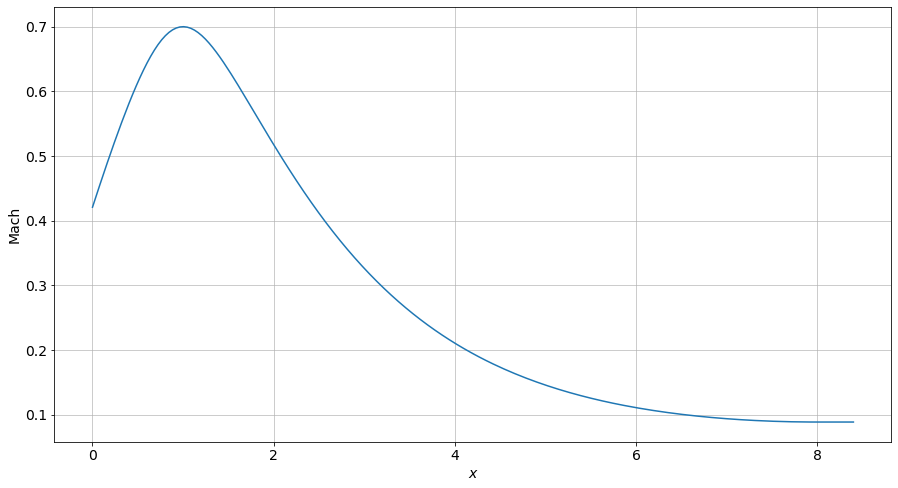

In [5]:
Ma_col = .7
#
_M  = mf.MachSub_Sigma(Noz_AoAc*mf.Sigma_Mach(Ma_col))
_M  = np.append(_M, [_M[-1], _M[-1]])  # add constant points
_Pt = 0.*coord_x + 1.
_Ps = _Pt/Is.PtPs_Mach(_M)
#
new_plot('$x$','Mach')
plt.plot(coord_x, _M)

(0.0, 1.05)

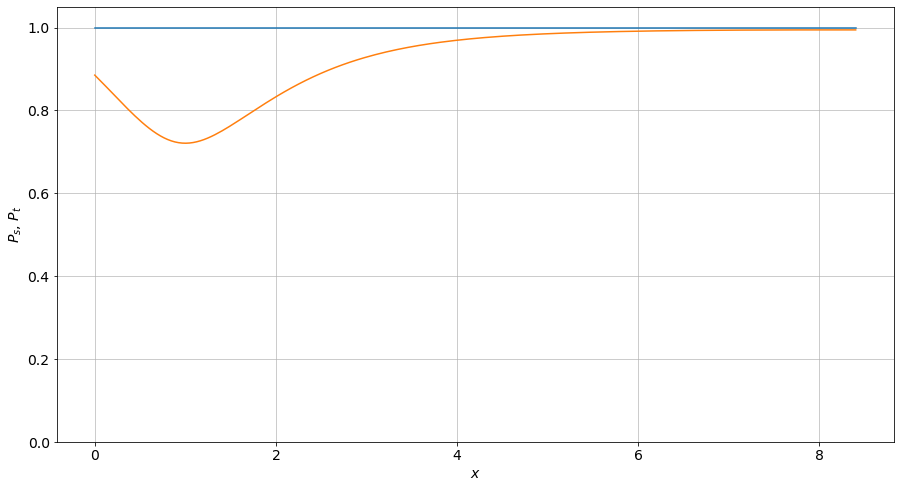

In [6]:
new_plot('$x$','$P_s$, $P_t$')
plt.plot(coord_x, _Pt, coord_x, _Ps)
plt.ylim(0, 1.05)

# Isentropic subsonic and choked flow

In [7]:
_M  = mf.Mach_Sigma(Noz_AoAc, Mach=.05)
_M  = np.append(_M, [_M[-1], _M[-1]])  # add constant points
_Pt = 0.*coord_x + 1.
_Ps = _Pt/Is.PtPs_Mach(_M)
#
new_plot('$x$','Mach')
plt.plot(coord_x, _M)

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [ ]:
new_plot('$x$','$P_s$, $P_t$')
plt.plot(coord_x, _Pt, coord_x, _Ps)
plt.ylim(0, 1.05)

# Isentropic supersonic flow

In [ ]:
_Minit = .05 + (Noz_x > 1.)*2.   # set initial guess to .05 in convergent, 2. in diffuser
_M  = mf.Mach_Sigma(Noz_AoAc, Mach=_Minit)
_M  = np.append(_M, [_M[-1], _M[-1]])  # add constant points
_Pt = 0.*coord_x + 1.
_Ps = _Pt/Is.PtPs_Mach(_M)
#
new_plot('$x$','Mach')
plt.plot(coord_x, _M)

In [ ]:
new_plot('$x$','$P_s$, $P_t$')
plt.plot(coord_x, _Pt, coord_x, _Ps)
plt.ylim(0, 1.05)

# Supersonic nozzle with normal shock at exit

In [ ]:
# this is the same computation as previous cell but it is repeated to make it self consistent
_Minit = .05 + (Noz_x > 1.)*2.   # set initial guess to .05 in convergent, 2. in diffuser
_M  = mf.Mach_Sigma(Noz_AoAc, Mach=_Minit)
Msh    = sw.downstream_Mn(_M[-1])
Ptloss = sw.Pi_ratio(_M[-1])
_M  = np.append(_M, [Msh, Msh])  # add constant points
_Pt = np.append(0.*Noz_x + 1., [Ptloss, Ptloss]);
_Ps = _Pt/Is.PtPs_Mach(_M)
#
new_plot('$x$','Mach')
plt.plot(coord_x, _M)

In [ ]:
new_plot('$x$','$P_s$, $P_t$')
plt.plot(coord_x, _Pt, coord_x, _Ps)
plt.ylim(0, 1.05)

# Supersonic nozzle with normal shock in diffuser

In [ ]:
pos = .5                            # 0 to 1 parameter to control shock position
NPR = NPR0*(1.-pos)+NPRsw*pos
#
# this is the same computation as previous cell but it is repeated to make it self consistent
_Minit = .05 + (Noz_x > 1.)*2.   # set initial guess to .05 in convergent, 2. in diffuser
_M  = mf.Mach_Sigma(Noz_AoAc, Mach=_Minit)
#
# analytical solution for Ms
K      = NPR/target_AoAc/((defg._gamma+1.)/2)**((defg._gamma+1.)/2/(defg._gamma-1.))
Ms     = np.sqrt((np.sqrt(1.+2.*(defg._gamma-1.)*K*K)-1.)/(defg._gamma-1))
#
# computation of shock wave (losses and upsptream Mach number)
Ptloss = Is.PtPs_Mach(Ms)/NPR
Msh    = sw.Mn_Pi_ratio(Ptloss)
#
# redefine curves starting from 'ish' index (closest value of Msh in supersonic flow)
ish    = np.abs(_M-Msh).argmin()
_M[ish:] = mf.MachSub_Sigma(Noz_AoAc[ish:]*mf.Sigma_Mach(Ms)/target_AoAc)
_M  = np.append(_M, [Ms, Ms])  # add constant points
_Pt = np.append(0.*Noz_x + 1., [Ptloss, Ptloss]);
_Pt[ish:] = Ptloss
_Ps = _Pt/Is.PtPs_Mach(_M)
#
new_plot('$x$','Mach')
plt.plot(coord_x, _M)

In [ ]:
new_plot('$x$','$P_s$, $P_t$')
plt.plot(coord_x, _Pt, coord_x, _Ps)
plt.ylim(0, 1.05)

In [ ]:
from IPython.core.display import HTML ; HTML(open("./custom.css", "r").read()) # notebook style